In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import multiprocessing
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')

In [18]:
from utils import to_radian,res_to_rad,ax_to_w,rep_to_angle
from rotation_3d import tricubic_derivatives,tricubic_interp
from visualize import plot_cost_func
from cost_functions import cf_ssd
from Gauss_Newton import Gauss_Newton, axis_derivatives,print_results
from mask import sphere_mask

In [4]:
sept23_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_10.p','rb'))
sept23_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_8.p','rb'))
sept23_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_6_4.p','rb'))
oct13_dict_10 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_10.p','rb'))
oct13_dict_8 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_8.p','rb'))
oct13_dict_6_4 = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/oct13_dict_6_4.p','rb'))

In [5]:
# Get All Axes of Rotations
path = '/Users/zyzdiana/Dropbox/THESIS/Sept_23_navs/'
ranges = ['0_5_to_2_5','3_0_to_5_0']
files = os.listdir(path)
axes_dict = {}
for f in files[1:]:
    rot_ax = f.split('_')[2]
    trans_ax = f.split('_')[10]
    if not axes_dict.has_key(rot_ax):
        axes_dict[rot_ax] = trans_ax
print axes_dict
print axes_dict.keys()

{'xz': 'xy', 'y': 'z', 'yz': 'xy', 'xy': 'xy', 'x': 'z', 'z': 'z'}
['xz', 'y', 'yz', 'xy', 'x', 'z']


## Rotations Only

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


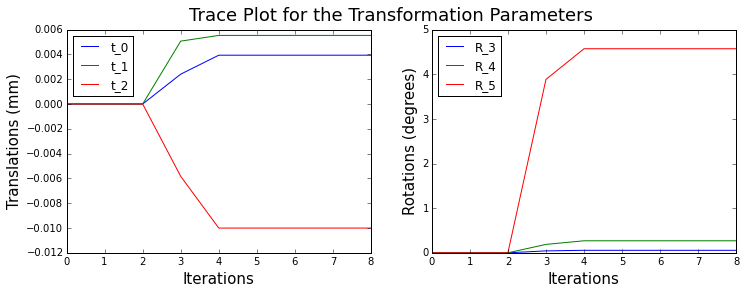

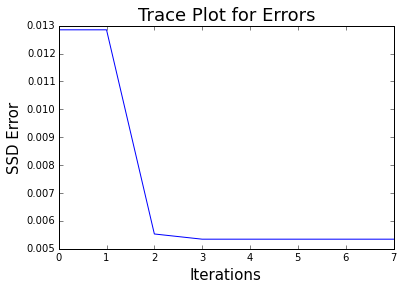

min error:  0.00534462258992
parameters at min error:  [ 0.00049193  0.00069135 -0.00125076  0.00097247  0.0047001   0.07978152]
translation (in mm): [ 0.00393543  0.00553084 -0.01000608]
rotations (in degrees): [ 0.05571814  0.26929562  4.57114459]


In [21]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


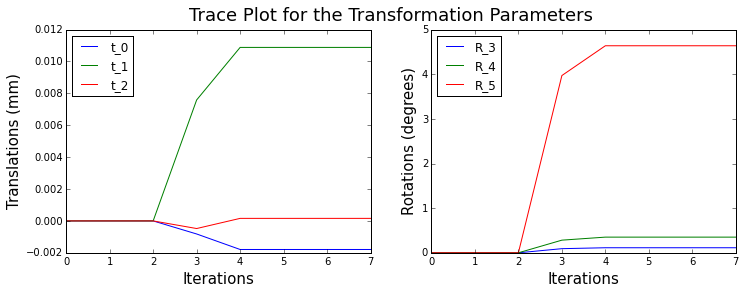

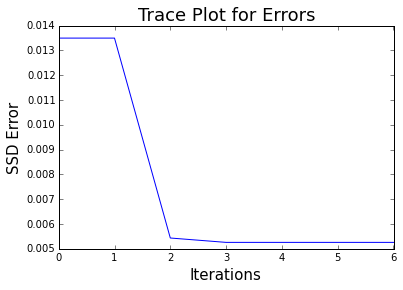

min error:  0.00525892516622
parameters at min error:  [ -2.24006773e-04   1.36036114e-03   1.99252405e-05   1.97620789e-03
   6.12731386e-03   8.09490745e-02]
translation (in mm): [-0.00179205  0.01088289  0.0001594 ]
rotations (in degrees): [ 0.11322837  0.35106922  4.63804032]


In [27]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


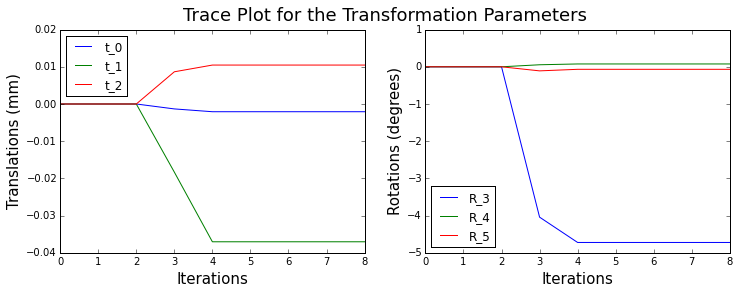

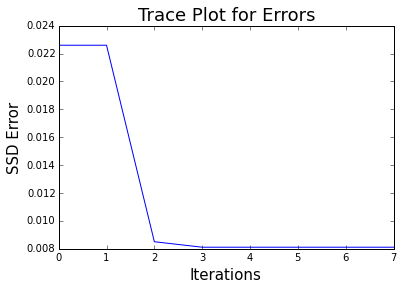

min error:  0.00811362712125
parameters at min error:  [-0.00025938 -0.00462956  0.00130833 -0.08241487  0.00133443 -0.00117904]
translation (in mm): [-0.00207503 -0.03703648  0.01046666]
rotations (in degrees): [-4.72202425  0.07645708 -0.06755387]


In [22]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


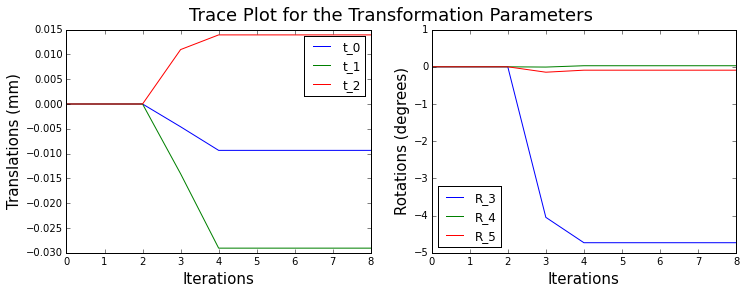

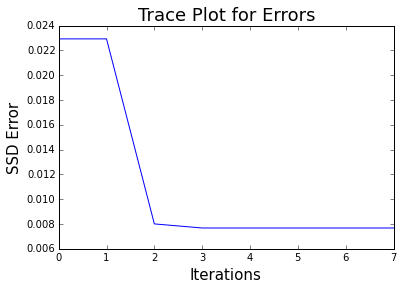

min error:  0.00767809683072
parameters at min error:  [-0.00116875 -0.00363266  0.00174158 -0.08253366  0.00050151 -0.00159023]
translation (in mm): [-0.00935001 -0.02906129  0.0139326 ]
rotations (in degrees): [-4.72883041  0.0287345  -0.09111357]


In [29]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


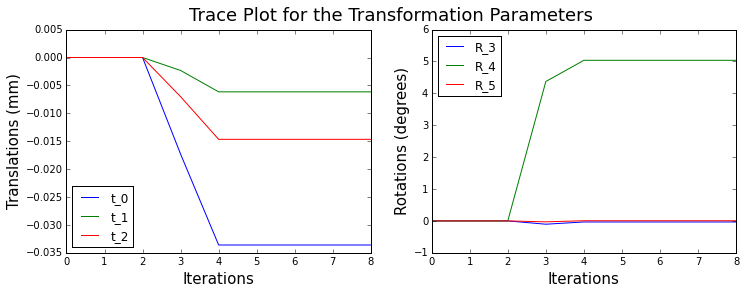

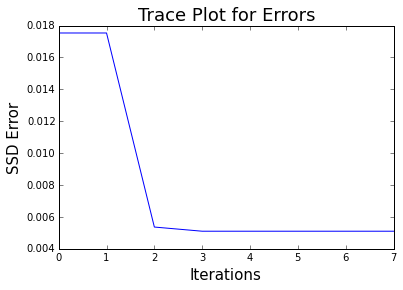

min error:  0.00510308302923
parameters at min error:  [ -4.20023090e-03  -7.69482484e-04  -1.83303454e-03  -5.76120332e-04
   8.79080873e-02   8.99983861e-05]
translation (in mm): [-0.03360185 -0.00615586 -0.01466428]
rotations (in degrees): [-0.03300926  5.03676238  0.00515653]


In [23]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


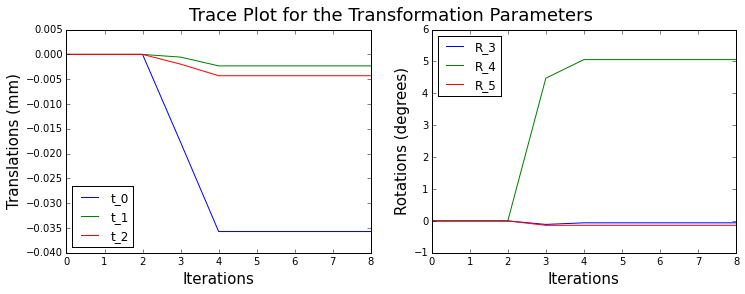

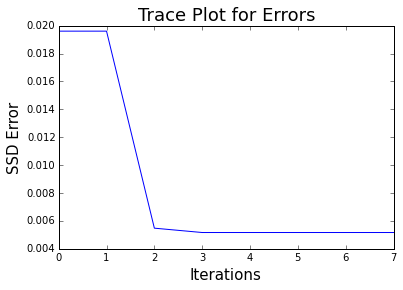

min error:  0.00516731108027
parameters at min error:  [-0.00446408 -0.00028917 -0.00053748 -0.00104202  0.08830432 -0.00239155]
translation (in mm): [-0.03571261 -0.00231339 -0.00429983]
rotations (in degrees): [-0.0597032   5.05946469 -0.1370257 ]


In [28]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 Converged in 12 iterations!


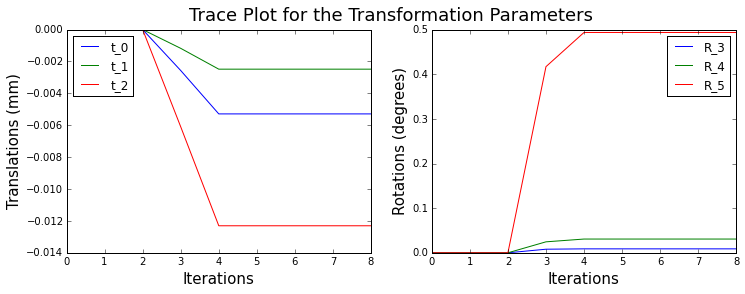

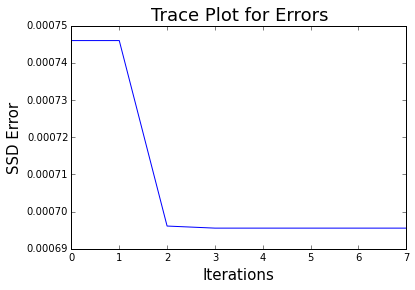

min error:  0.000695557524866
parameters at min error:  [-0.00066096 -0.00031022 -0.0015381   0.00015417  0.00053771  0.00861442]
translation (in mm): [-0.00528767 -0.00248176 -0.01230478]
rotations (in degrees): [ 0.00883351  0.03080854  0.49357007]


In [24]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


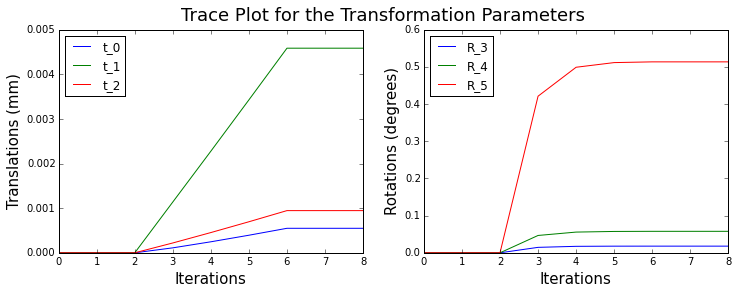

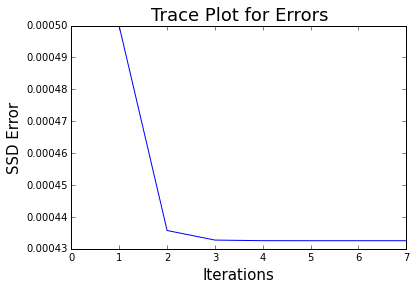

min error:  0.000432537442533
parameters at min error:  [  6.86110600e-05   5.72944076e-04   1.18129780e-04   3.12518989e-04
   1.00762765e-03   8.95817740e-03]
translation (in mm): [ 0.00054889  0.00458355  0.00094504]
rotations (in degrees): [ 0.01790602  0.05773281  0.51326576]


In [30]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


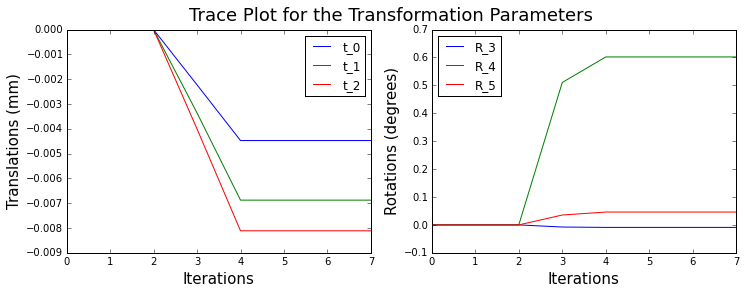

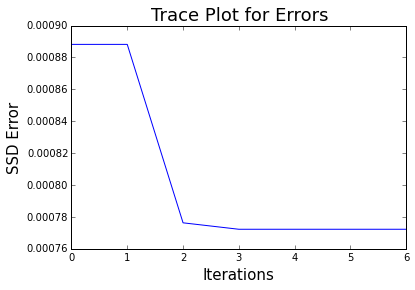

min error:  0.000772254025179
parameters at min error:  [-0.00055915 -0.00085954 -0.0010141  -0.00015686  0.01050693  0.00080368]
translation (in mm): [-0.00447322 -0.00687633 -0.00811283]
rotations (in degrees): [-0.00898758  0.60200298  0.04604733]


In [25]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 Converged in 10 iterations!


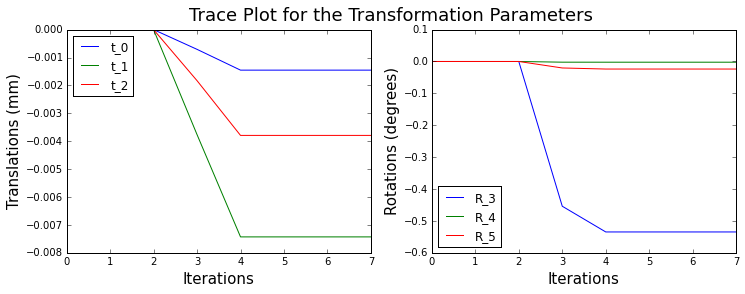

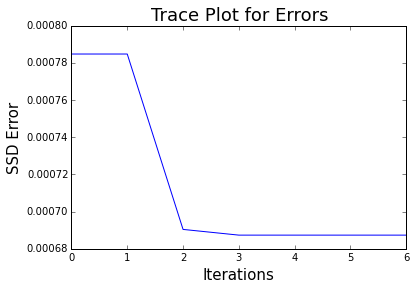

min error:  0.000687352627102
parameters at min error:  [ -1.81614525e-04  -9.28746516e-04  -4.74050624e-04  -9.33078687e-03
  -3.90735703e-05  -4.13343253e-04]
translation (in mm): [-0.00145292 -0.00742997 -0.0037924 ]
rotations (in degrees): [-0.53461471 -0.00223875 -0.02368282]


In [26]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.5, 0)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

# Translations Only

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 Converged in 16 iterations!


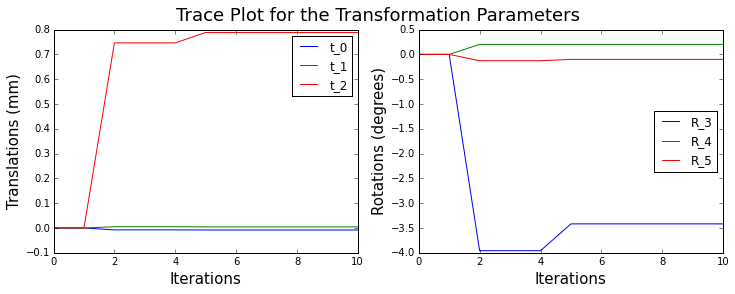

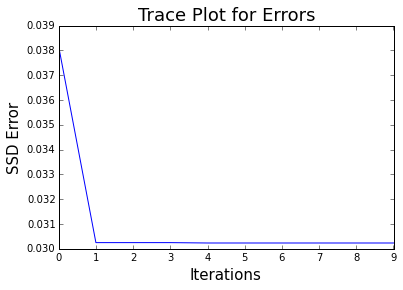

min error:  0.0302339888518
parameters at min error:  [-0.00099803  0.00055621  0.09856861 -0.0596399   0.003525   -0.00175602]
translation (in mm): [-0.00798424  0.00444969  0.7885489 ]
rotations (in degrees): [-3.41711438  0.20196781 -0.10061225]


In [36]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 Converged in 19 iterations!


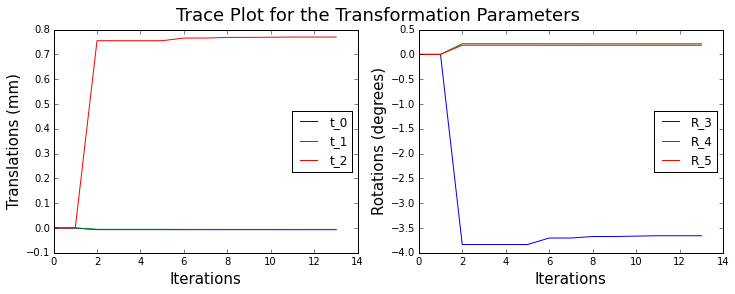

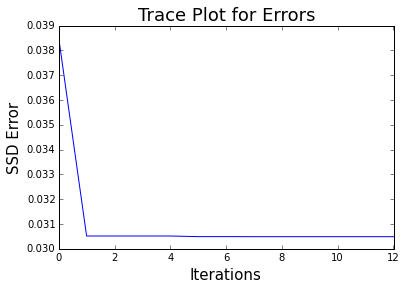

min error:  0.0304885896337
parameters at min error:  [-0.00084075 -0.00072608  0.09623993 -0.06380715  0.00371848  0.0032117 ]
translation (in mm): [-0.00672596 -0.00580862  0.76991942]
rotations (in degrees): [-3.65588018  0.21305306  0.18401693]


In [31]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 Converged in 17 iterations!


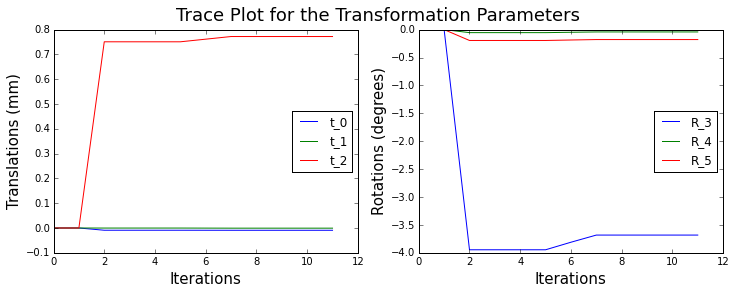

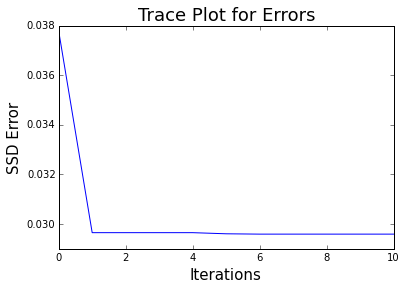

min error:  0.0295914991632
parameters at min error:  [ -1.14682212e-03  -8.33875828e-05   9.65082173e-02  -6.42682861e-02
  -7.30716796e-04  -3.11486618e-03]
translation (in mm): [ -9.17457699e-03  -6.67100662e-04   7.72065738e-01]
rotations (in degrees): [-3.68230155 -0.04186699 -0.17846869]


In [32]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(0.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


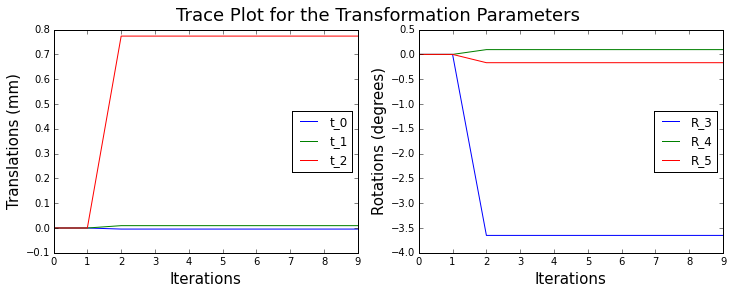

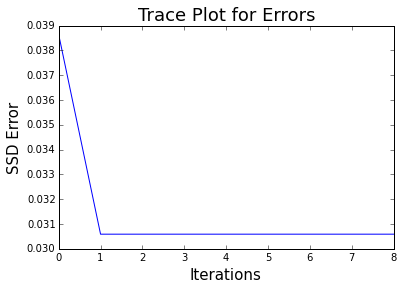

min error:  0.0305897356667
parameters at min error:  [-0.00053866  0.00118271  0.09672708 -0.06369454  0.00168451 -0.00291911]
translation (in mm): [-0.0043093   0.00946171  0.77381661]
rotations (in degrees): [-3.64942811  0.09651543 -0.16725282]


In [33]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 Converged in 18 iterations!


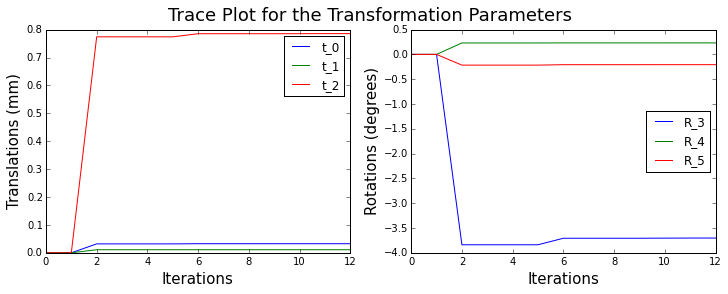

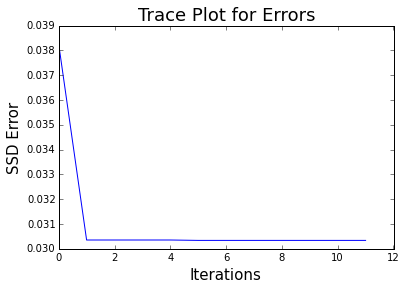

min error:  0.0303388215102
parameters at min error:  [ 0.00407599  0.00138196  0.09819931 -0.06462269  0.0040452  -0.00361375]
translation (in mm): [ 0.03260789  0.01105567  0.78559446]
rotations (in degrees): [-3.70260723  0.23177294 -0.2070527 ]


In [34]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 Converged in 16 iterations!


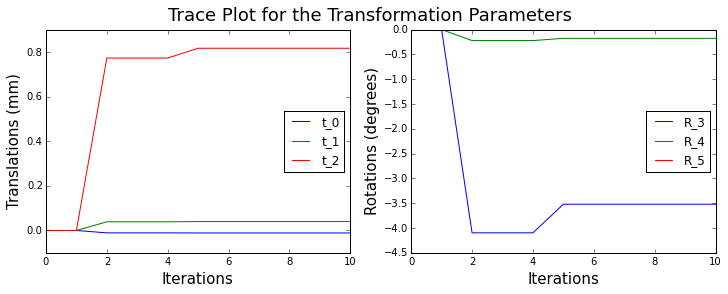

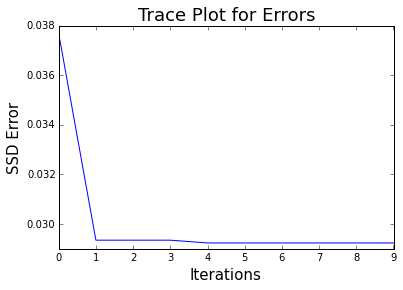

min error:  0.029235644471
parameters at min error:  [ -1.38842588e-03   4.99771078e-03   1.02047795e-01  -6.14415887e-02
  -3.07522223e-03  -3.26602807e-05]
translation (in mm): [-0.01110741  0.03998169  0.81638236]
rotations (in degrees): [ -3.52034372e+00  -1.76197255e-01  -1.87129624e-03]


In [35]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[0]][(2.5, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Converged in 15 iterations!


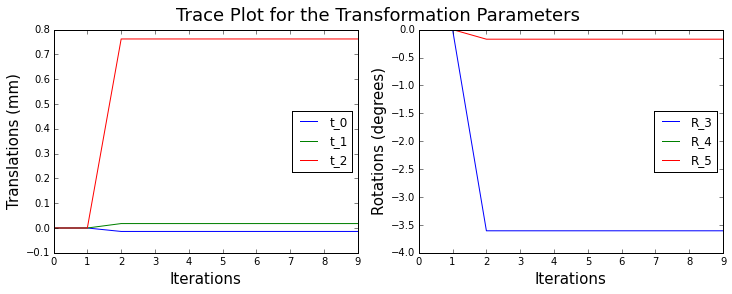

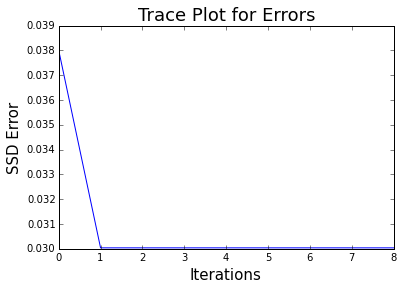

min error:  0.0300383317372
parameters at min error:  [ -1.73759300e-03   2.23540235e-03   9.52806184e-02  -6.29292379e-02
  -7.20205726e-06  -2.99885420e-03]
translation (in mm): [-0.01390074  0.01788322  0.76224495]
rotations (in degrees): [ -3.60557974e+00  -4.12647485e-04  -1.71821689e-01]


In [37]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'z'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 Converged in 16 iterations!


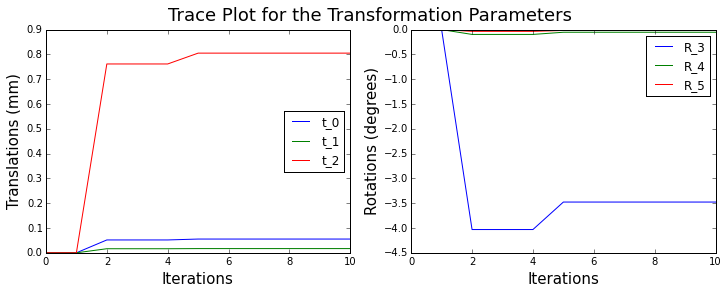

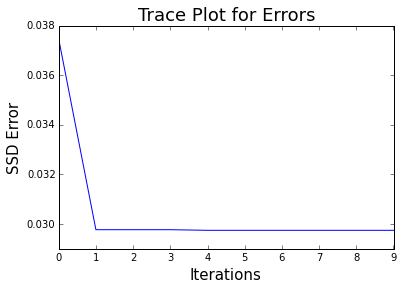

min error:  0.0297452778058
parameters at min error:  [ 0.00693011  0.00212654  0.10064041 -0.06068264 -0.00093085 -0.00030254]
translation (in mm): [ 0.05544092  0.01701233  0.80512329]
rotations (in degrees): [-3.47685888 -0.0533335  -0.01733434]


In [38]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'y'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 Converged in 17 iterations!


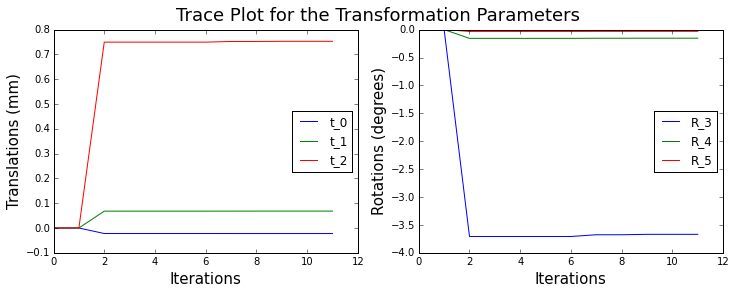

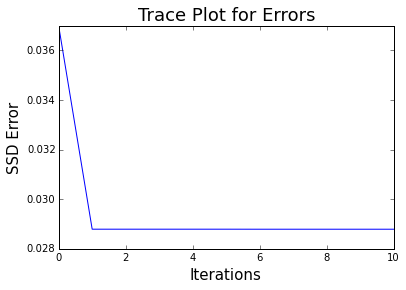

min error:  0.0287896217133
parameters at min error:  [-0.00279557  0.00852014  0.09409979 -0.06403449 -0.0026889  -0.00054458]
translation (in mm): [-0.02236453  0.06816111  0.75279835]
rotations (in degrees): [-3.66890622 -0.15406285 -0.03120211]


In [39]:
# Calculate the radius for masking
res = '8'
rad = res_to_rad(res)
rot_ax = 'x'

# Get two volumes to register
testVol1 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 0)],rad)
testVol2 = sphere_mask(oct13_dict_8[rot_ax][axes_dict[rot_ax]][ranges[1]][(5.0, 5)],rad)

vol1_dervs = axis_derivatives(testVol1)
vol2_dervs = tricubic_derivatives(testVol2)

errors, Ps = Gauss_Newton(testVol1,vol1_dervs,testVol2,vol2_dervs)
print_results(errors, Ps, 8)